In [1]:
import numpy as np
import scipy.optimize
%cd "~/moses-incons-pen-xp"
%load_ext autoreload
%autoreload 2

/home/xabush/moses-incons-pen-xp


In [33]:
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from datetime import datetime
from notebooks.variable_selection.util import *
from notebooks.variable_selection.grad_util import *

In [15]:
X, beta, y_log = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=100)

In [16]:
assoc_mat = get_assoc_mat(200, 10)
assoc_mat.shape

(2200, 2200)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.5, stratify=y_log, random_state=42)
# X_train, X_test = preprocess_data(X_train, X_test)

In [18]:
n_iter = 15
l1_vals = np.logspace(-2, 0, n_iter)
# l1_vals = np.concatenate([np.array([0]), l1_vals])
l2_vals = np.logspace(-5, 1, n_iter)
# l2_vals = np.concatenate([np.array([0]), l2_vals])
gammas = np.logspace(-1, 3, 10)

In [12]:
def add_bias(X):
    return np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

In [ ]:
from notebooks.variable_selection.grad_util import run_logisitic_reg_exp, build_table_from_log, run_logisitic_reg_exp_no_bp
from notebooks.variable_selection.log_util import log_msg

train_errs_cv_0, test_errs_0, train_ll_pen_0, test_ll_pen_0, \
    train_l1_pen_0, test_l1_pen_0, train_l2_pen_0, test_l2_pen_0, min_l1_vals_0, min_l2_vals_0, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas, l1_vals, l2_vals, l2_norm=False, lap_norm=True)

res_1_df = build_table_from_log(gammas, train_errs_cv_0, test_errs_0, train_ll_pen_0, test_ll_pen_0,
                                train_l1_pen_0, test_l1_pen_0, min_l1_vals_0, train_l2_pen_0, test_l2_pen_0, min_l2_vals_0)

log_msg("Done")
res_1_df

[2022-03-07 14:02:06.679232] - gamma - 0.10
Min l1: 0.13894954943731375, Min l2: 1e-05, CV Error: 0.617692080372748, Test error: 0.5829498066647147
ll_pen_train: 0.3782981868143168, l1_pen_train: 0.6384385668668967, l2_pen_train: 9.841115777176762e-60
[2022-03-07 14:30:31.451206] - gamma - 0.28


/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/mi

Min l1: 0.13894954943731375, Min l2: 0.00019306977288832496, CV Error: 0.6503789854281472, Test error: 0.5878585562503837
ll_pen_train: 0.3952935181565476, l1_pen_train: 0.6296316423215401, l2_pen_train: 2.481071158124725e-07
[2022-03-07 14:58:59.982928] - gamma - 0.77


/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/nu

In [25]:
res_1_df

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,0.100000,0.655298,0.268270,0.000010,0.525274,0.383175,6.893482e-60,0.673813,0.605507,0.196548,4.037111
1,0.278256,0.676506,0.193070,0.000010,0.439675,0.532267,1.816850e-07,0.605311,0.447481,0.625737,42.133928
2,0.774264,0.643108,0.193070,0.000027,0.422730,0.605584,6.563590e+01,0.636193,0.443925,0.617146,47.983427
3,2.154435,0.685077,0.100000,0.010000,0.614829,0.163980,3.766189e+01,0.602801,0.377841,0.650365,57.944136
4,5.994843,0.655889,0.193070,0.000027,0.423383,0.584897,1.562816e+03,0.600844,0.370735,0.723026,73.888006
5,16.681005,0.642330,0.013895,0.003728,0.476561,0.303729,3.896480e+02,0.562917,0.061169,1.195234,435.550839
6,46.415888,0.637770,0.193070,0.000518,0.487541,0.422373,8.534519e+02,0.637822,0.519632,0.380014,17.619918
7,129.154967,0.663002,0.268270,0.000072,0.521745,0.373943,4.945408e+02,0.654852,0.540626,0.323411,12.702274
8,359.381366,0.628794,0.051795,0.000193,0.189043,1.021962,5.441705e+03,0.602604,0.195562,0.839816,150.921949
9,1000.000000,0.654893,0.100000,0.000193,0.345813,0.657193,1.913198e+03,0.558508,0.358040,0.762111,70.931370


In [ ]:
train_errs_cv, test_errs, train_ll_pen, test_ll_pen, train_l1_pen, test_l1_pen, min_l1_vals, _ = run_logisitic_reg_exp_no_bp(X_train, X_test, y_train, y_test, l1_vals)

res_2_df = build_table_from_log(gammas, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, min_l1_vals, lap=False)

res_2_df

In [26]:
res_2_df

,min_train_err_cv,l1_train_cv,ll_pen_train_cv,l1_pen_train_cv,test_err,ll_pen_test,l1_pen_test
0,0.63721,0.13895,0.385553,0.671676,0.634641,0.364894,0.71556


In [ ]:
import traceback
from notebooks.variable_selection.log_util import log_msg

results_1 = []
results_2 = []

n_sim = 50
assoc_mat = get_assoc_mat(200, 10)
beta_vals_1 = np.zeros((n_sim, 1, assoc_mat.shape[1]))
beta_vals_2 = np.zeros((n_sim, 1, assoc_mat.shape[1]))

idx_min = res_1_df["test_err"].idxmin()
min_gamma = res_1_df["gamma"][idx_min]
gamma = np.array([min_gamma])

for i in range(n_sim):
    try:
        log_msg(f"[{datetime.now()}] - Sim {i + 1}...")
        X_exp, beta_exp, y_log_exp = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=100)
        X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_log_exp, test_size=0.5, stratify=y_log_exp)

        train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1, \
        train_l1_pen_1, test_l1_pen_1, train_l2_pen_1, test_l2_pen_1, min_l1_vals_1, min_l2_vals_1, beta_vals_1[i] = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_vals, l2_vals, l2_norm=False, lap_norm=True)

        res_pen_df = build_table_from_log(gamma, train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1,
                                        train_l1_pen_1, test_l1_pen_1, min_l1_vals_1, train_l2_pen_1, test_l2_pen_1, min_l2_vals_1)

        train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2, \
        train_l1_pen_2, test_l1_pen_2, min_l1_vals_2, beta_vals_2[i] = run_logisitic_reg_exp_no_bp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, l1_vals)

        res_no_pen_df = build_table_from_log(gamma, train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2,
                                        train_l1_pen_2, test_l1_pen_2, min_l1_vals_2, lap=False)


        results_1.append(res_pen_df)
        results_2.append(res_no_pen_df)
    except Exception as e:
        log_msg("Oh, no! An error occurred. Here is the error message")
        log_msg(traceback.format_exc())

log_msg("Done")

[2022-02-27 11:04:01.286457] - Sim 1...
[2022-02-27 11:04:01.454685] - gamma - 1000.00


/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/tr

In [84]:
results_pen_1_df = pd.concat(results_1, axis=0)
results_no_pen_2_df = pd.concat(results_2, axis=0)

In [92]:
results_pen_1_df

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1000.0,0.423359,0.037276,0.000193,0.129022,1.193057,9789.228014,0.388002,0.126601,1.201247,291.582904
0,1000.0,0.464397,0.013895,0.000010,0.043038,1.506036,18391.044677,0.577152,0.045839,1.835252,602.376987
0,1000.0,0.596481,0.013895,0.000518,0.106491,1.162160,8955.960946,0.600783,0.051576,1.497268,540.949164
0,1000.0,0.666180,0.013895,0.003728,0.478748,0.250699,382.680144,0.687829,0.064163,1.344360,440.156905
0,1000.0,0.529177,0.051795,0.000027,0.161917,1.051773,6508.576569,0.560414,0.176091,1.220590,209.679740
0,1000.0,0.504064,0.019307,0.000072,0.069650,1.322589,12540.586423,0.530613,0.070366,1.393000,394.700521
0,1000.0,0.376882,0.019307,0.000010,0.056427,1.537652,16546.129395,0.432370,0.064219,1.420973,487.639086
0,1000.0,0.474240,0.026827,0.000010,0.088842,1.302672,11782.335508,0.560937,0.099885,1.294860,333.220464
0,1000.0,0.611796,0.013895,0.001389,0.288264,0.630811,1963.718237,0.577204,0.055374,1.715785,486.055303
0,1000.0,0.483652,0.010000,0.000010,0.032001,1.578138,22382.539275,0.368694,0.036764,1.611415,712.427883


In [91]:
results_no_pen_2_df

,min_train_err_cv,l1_train_cv,ll_pen_train_cv,l1_pen_train_cv,test_err,ll_pen_test,l1_pen_test
0,0.383107,0.026827,0.076661,1.389604,0.381268,0.089146,1.410410
0,0.454499,0.051795,0.157278,1.147960,0.455730,0.182204,1.183618
0,0.572649,0.100000,0.313654,0.808853,0.596106,0.300438,0.929601
0,0.682531,0.100000,0.298523,0.807155,0.613377,0.344248,0.927999
0,0.645418,0.037276,0.118814,1.173144,0.541515,0.130108,1.237862
0,0.580370,0.019307,0.063312,1.428014,0.457935,0.072787,1.442168
0,0.479339,0.019307,0.058383,1.424324,0.470977,0.062559,1.525606
0,0.539091,0.051795,0.167716,1.055530,0.491964,0.202786,0.952892
0,0.689505,0.372759,0.612918,0.205497,0.687345,0.579440,0.301704
0,0.480009,0.037276,0.119050,1.231483,0.405111,0.132533,1.223828


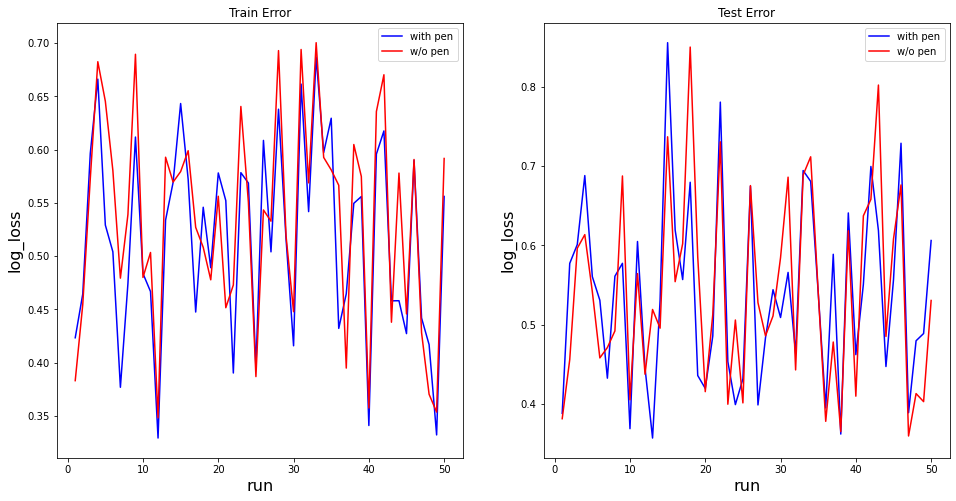

In [174]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

r = np.arange(1, 51)
ax[0].plot(r, results_pen_1_df["min_train_err_cv"], color="blue", label="with pen")
ax[0].plot(r, results_no_pen_2_df["min_train_err_cv"], color="red", label="w/o pen")
ax[0].set_xlabel(r"run", fontsize=16)
ax[0].set_ylabel(r"log_loss", fontsize=16)
ax[0].set_title("Train Error")
ax[0].legend()

ax[1].plot(r, results_pen_1_df["test_err"], color="blue", label="with pen")
ax[1].plot(r, results_no_pen_2_df["test_err"], color="red", label="w/o pen")
ax[1].set_xlabel(r"run", fontsize=16)
ax[1].set_ylabel(r"log_loss", fontsize=16)
ax[1].set_title("Test Error")
ax[1].legend()

In [175]:
results_pen_1_df.mean()

gamma                1000.000000
min_train_err_cv        0.516532
l1_train_cv             0.044422
l2_train_cv             0.000316
ll_pen_train_cv         0.144339
l1_pen_train_cv         1.159758
l2_pen_train_cv     11022.754336
test_err                0.538054
ll_pen_test             0.112948
l1_pen_test             1.369764
l2_pen_test           433.329066
dtype: float64

In [176]:
results_no_pen_2_df.mean()

min_train_err_cv    0.534880
l1_train_cv         0.094292
ll_pen_train_cv     0.172564
l1_pen_train_cv     1.131937
test_err            0.541690
ll_pen_test         0.184455
l1_pen_test         1.204532
dtype: float64

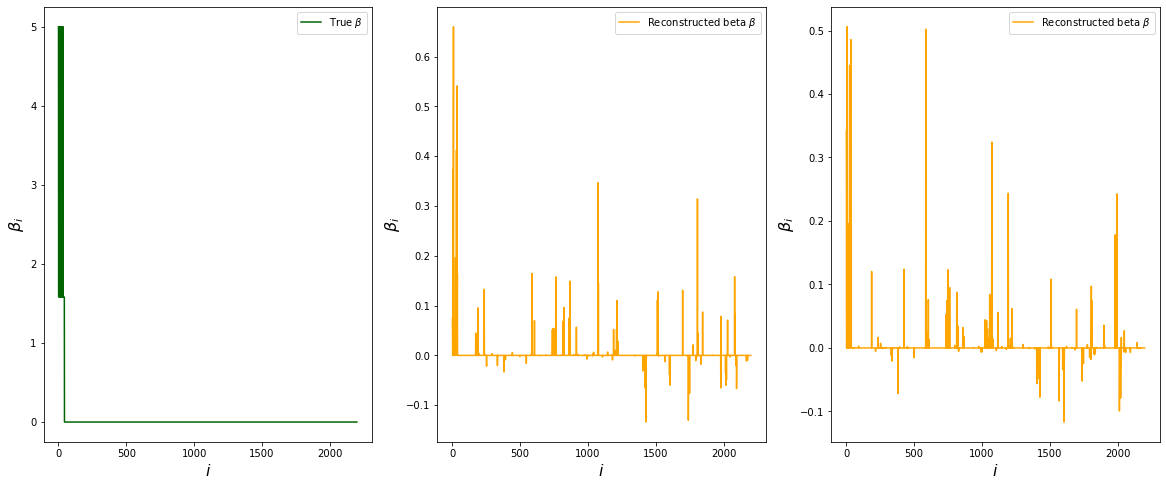

In [95]:
# plt.plot(beta_lin, label=r"True $\beta$")
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
ax[0].plot(beta, label=r"True $\beta$", color="darkgreen")
ax[0].set_xlabel(r"$i$", fontsize=16)
ax[0].set_ylabel(r"$\beta_i$", fontsize=16)
ax[0].legend(loc="upper right")
ax[1].plot(beta_vals_1[5][0], label=r"Reconstructed beta $\beta$", color="orange")
ax[1].set_xlabel(r"$i$", fontsize=16)
ax[1].set_ylabel(r"$\beta_i$", fontsize=16)
ax[1].legend(loc="upper right")
ax[2].plot(beta_vals_2[5][0], label=r"Reconstructed beta $\beta$", color="orange")
ax[2].set_xlabel(r"$i$", fontsize=16)
ax[2].set_ylabel(r"$\beta_i$", fontsize=16)
ax[2].legend(loc="upper right")

In [ ]:
import traceback
from notebooks.variable_selection.log_util import log_msg

results_3 = []
results_4 = []

n_sim = 50
assoc_mat = get_assoc_mat(200, 10)
beta_vals_3 = np.zeros((n_sim, 1, assoc_mat.shape[1]))
beta_vals_4 = np.zeros((n_sim, 1, assoc_mat.shape[1]))

# idx_min = res_1_df["test_err"].idxmin()
# min_gamma = res_1_df["gamma"][idx_min]
gamma = np.array([1.0])

for i in range(n_sim):
    try:
        log_msg(f"[{datetime.now()}] - Sim {i + 1}...")
        X_exp, beta_exp, y_log_exp = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=100)
        X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_log_exp, test_size=0.5, stratify=y_log_exp)

        train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1, \
        train_l1_pen_1, test_l1_pen_1, train_l2_pen_1, test_l2_pen_1, min_l1_vals_1, min_l2_vals_1, beta_vals_3[i] = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_vals, l2_vals, l2_norm=False, lap_norm=True)

        res_pen_df = build_table_from_log(gamma, train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1,
                                        train_l1_pen_1, test_l1_pen_1, min_l1_vals_1, train_l2_pen_1, test_l2_pen_1, min_l2_vals_1)

        train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2, \
        train_l1_pen_2, test_l1_pen_2, min_l1_vals_2, beta_vals_4[i] = run_logisitic_reg_exp_no_bp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, l1_vals)

        res_no_pen_df = build_table_from_log(gamma, train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2,
                                        train_l1_pen_2, test_l1_pen_2, min_l1_vals_2, lap=False)


        results_3.append(res_pen_df)
        results_4.append(res_no_pen_df)
    except Exception as e:
        log_msg("Oh, no! An error occurred. Here is the error message")
        log_msg(traceback.format_exc())

log_msg("Done")

[2022-03-01 21:05:27.463742] - Sim 1...
[2022-03-01 21:05:27.628853] - gamma - 1.00


/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid 

In [191]:
results_pen_3_df = pd.concat(results_3, axis=0)
results_no_pen_4_df = pd.concat(results_4, axis=0)

In [193]:
results_pen_3_df.mean()

gamma                  1.000000
min_train_err_cv       0.551325
l1_train_cv            0.055791
l2_train_cv            0.017776
ll_pen_train_cv        0.200783
l1_pen_train_cv        1.064101
l2_pen_train_cv     2777.738805
test_err               0.562084
ll_pen_test            0.165728
l1_pen_test            1.239227
l2_pen_test          355.668880
dtype: float64

In [194]:
results_no_pen_4_df.mean()

min_train_err_cv    0.559315
l1_train_cv         0.100797
ll_pen_train_cv     0.187548
l1_pen_train_cv     1.114139
test_err            0.577053
ll_pen_test         0.201784
l1_pen_test         1.165154
dtype: float64

In [115]:
beta_t = np.random.rand(beta.shape[0])
scipy.optimize.check_grad(objective_log_loss_l2, grad(objective_log_loss_l2), beta_t,  X_train, y_train, L, 0.01, 0.0001)

1.4555763807717307e-05

In [117]:
scipy_grad = scipy.optimize.approx_fprime(beta_t, objective_log_loss_l1, beta_t,  X_train, y_train, L, 0.01, 0.0001)
auto_grad = grad(objective_log_loss_l1)(beta_t,  X_train, y_train, L, 0.01, 0.0001)
mean_squared_error(scipy_grad, auto_grad)

1.088324587064722e-05

In [136]:
from autograd import hessian, jacobian
jac_loss_l1 = jacobian(objective_log_loss_l1)
hess_loss_l1 = hessian(objective_log_loss_l1)
opt_res_newton = scipy.optimize.minimize(objective_log_loss_l1, method="Newton-CG", x0=beta_t, args=(X_train, y_train, L, 0.01, 0.0001), jac=jac_loss_l1, hess=hess_loss_l1, options={"maxiter": 10000, "xtol": 1e-3})
opt_res_lbfgs = scipy.optimize.fmin_l_bfgs_b(objective_log_loss_l1, fprime=grad(objective_log_loss_l1),  x0=beta_t, args=(X_train, y_train, L, 0.01, 0.0001), maxiter=10000, pgtol=1e-3)
opt_res_ndm = scipy.optimize.minimize(objective_log_loss_l1, method="Nelder-Mead", x0=beta_t, args=(X_train, y_train, L, 0.01, 0.0001), options={"maxiter": 10000, "xatol": 1e-3})
opt_res_pow = scipy.optimize.minimize(objective_log_loss_l1, method="Powell", x0=beta_t, args=(X_train, y_train, L, 0.01, 0.0001), options={"maxiter": 10000, "xatol": 1e-3})

/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/home/xabush/miniconda3/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/tmp/ipykernel_2437/315117864.py:7: OptimizeWarning: Unknown solver options: xatol
  opt_res_pow = scipy.optimize.minimize(objective_log_loss_l1, method="Powell", x0=beta_t, args=(X_train, y_train, L, 0.01, 0.0001), options={"maxiter": 10000, "xatol": 1e-3})


In [ ]:
opt_res_lbfgs_2 = scipy.optimize.fmin_l_bfgs_b(objective_log_loss_l1, fprime=grad(objective_log_loss_l1),  x0=beta_t, args=(X_train, y_train, L, 0.1, 0.01), maxiter=10000, pgtol=1e-3)

In [170]:
opt_res_lbfgs_2

(array([ 9.78998418e-04,  9.56010979e-08,  6.74838936e-07, ...,
        -2.22078922e-10, -9.80762189e-09, -8.57393646e-12]),
 0.639383954203203,
 {'grad': array([-0.00311158,  0.02427999,  0.02948263, ..., -0.0731152 ,
         -0.02780591, -0.05002225]),
  'task': 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
  'funcalls': 2836,
  'nit': 2823,
  'warnflag': 0})

In [171]:
log_loss_cp(X_test, y_test, opt_res_lbfgs[0])

0.6512896194548148

In [65]:
beta_path = []
loss_fns = []

def save_intr_betas(beta_k):
    beta_path.append(beta_k)
    loss_fns.append(loss_fn(X_train, y_train, beta_k))


In [66]:
beta_0 = np.random.rand(X_train.shape[1])
scipy.optimize.fmin_l_bfgs_b(objective_log_loss_l1, x0=beta_0, fprime=grad(objective_log_loss_l1), epsilon=1e-3,
                                                    args=(X_train, y_train, L, 0.01, 7.2e-5), maxiter=1000, callback=save_intr_betas)

(array([ 9.97461923e-05,  5.97116972e-05,  4.95091232e-06, ...,
         3.54635677e-07, -6.79637669e-06,  2.95557485e-07]),
 0.15321024689189017,
 {'grad': array([ 0.00109344,  0.00315123,  0.00480018, ...,  0.01292047,
         -0.00192959,  0.01439196]),
  'task': 'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT',
  'funcalls': 1008,
  'nit': 1000,
  'warnflag': 1})

/tmp/ipykernel_2437/824864391.py:16: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


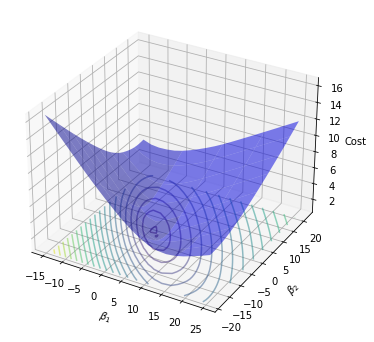

In [177]:
ms = np.linspace(beta[0] - 20, beta[0] + 20, 20)
bs = np.linspace(beta[1] - 20, beta[1] + 20, 40)

M, B = np.meshgrid(ms, bs)
zs = np.array([objective_log_loss_l1(b, X_train[:,[0, 1]], y_train, L, 0, 0) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel=r'$\beta_{1}$',
                     ylabel=r'$\beta_{2}$', zlabel='Cost')

# plot mse loss hypersurface and contours

ax.plot_surface(M, B, Z, rstride=5, cstride=5, color='b', alpha=0.5)

ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
ax.view_init(elev=30, azim=-60)
plt.show()

/tmp/ipykernel_2437/1002920293.py:18: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


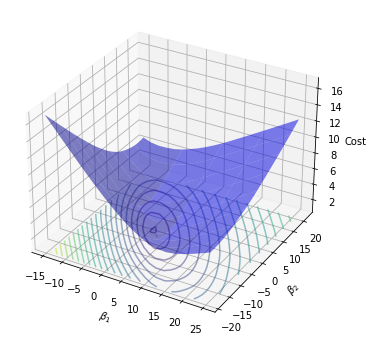

In [153]:
from mpl_toolkits.mplot3d import Axes3D
# plt.ion()
ms = np.linspace(beta[0] - 20, beta[0] + 20, 20)
bs = np.linspace(beta[1] - 20, beta[1] + 20, 40)

M, B = np.meshgrid(ms, bs)
zs = np.array([objective_log_loss_l1(b, X_train[:,[0, 1]], y_train, L, 0.01, 1e-4) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel=r'$\beta_{1}$',
                     ylabel=r'$\beta_{2}$', zlabel='Cost')

# plot mse loss hypersurface and contours

ax.plot_surface(M, B, Z, rstride=5, cstride=5, color='b', alpha=0.5)

ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
ax.view_init(elev=30, azim=-60)
plt.show()

/tmp/ipykernel_4850/185568810.py:10: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


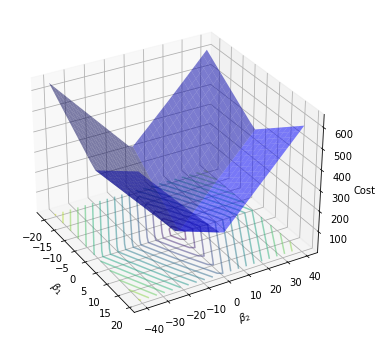

In [40]:
zs = np.array([objective_log_loss_l1(b, X[:,[0, 1]], y_log, L, 10.0, 0.0) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel=r'$\beta_{1}$',
                     ylabel=r'$\beta_{2}$', zlabel='Cost')

# plot mse loss hypersurface and contours
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
ax.view_init(elev=30, azim=-30)
plt.show()

In [179]:
%matplotlib notebook

In [189]:
ms = np.linspace(-5, 5, 200)
bs = np.linspace(-5, 5, 200)

M, B = np.meshgrid(ms, bs)
zs = np.array([objective_log_loss_l1(b, X_train[:,[0, 1]], y_train, L, 0, 0.1) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel=r'$\beta_{1}$',
                     ylabel=r'$\beta_{2}$', zlabel='Cost')

# plot mse loss hypersurface and contours
ax.plot([0.0], [0.0], markerfacecolor='black', markeredgecolor='r', marker='o', markersize=7)
ax.plot([beta[0]], [beta[1]] , markerfacecolor='red', marker='o', markersize=7)
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
ax.view_init(elev=30, azim=-60)
plt.show()

<IPython.core.display.Javascript object>

/tmp/ipykernel_2437/2586392480.py:17: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


In [92]:
ms = np.linspace(beta_t[0] - 20, beta_t[0] + 20, 40)
bs = np.linspace(beta_t[1] - 20, beta_t[1] + 20, 40)

M, B = np.meshgrid(ms, bs)
zs = np.array([objective_log_loss_l1(b, X[:,[0, 1]], y_log, L, 0.01, 0.01) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel=r'$\beta_{1}$',
                     ylabel=r'$\beta_{2}$', zlabel='Cost')

# plot mse loss hypersurface and contours
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
ax.view_init(elev=30, azim=-30)
plt.show()

<IPython.core.display.Javascript object>

/tmp/ipykernel_4850/4220103904.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


In [97]:
zs = np.array([objective_log_loss_l2(b, X[:,[0, 1]], y_log, L, 3, 0.01) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel=r'$\beta_{1}$',
                     ylabel=r'$\beta_{2}$', zlabel='Cost')

# plot mse loss hypersurface and contours
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
plt.show()

<IPython.core.display.Javascript object>

/tmp/ipykernel_4850/758297784.py:10: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


In [50]:


def batch_gradient_descent(X, y, L, l1, l2, step=1e-1, max_iter=100, tol=1e-2, l2_norm=False):
    #randomly initialize beta
    n, p = X.shape
    beta = np.random.rand(p)

    #initialise histories
    losses = [log_loss_cp(X, y, beta)]
    betas = [beta.copy()]
    for i in range(max_iter):
        if l2_norm:
            grad = grad_log_loss_l2(beta, X, y, L, l1, l2)
        else:
            grad = grad_log_loss_l1(beta, X, y, L, l1, l2)

        beta -= step * grad
        loss = log_loss_cp(X, y, beta)
        losses.append(loss)
        betas.append(beta.copy())

        if np.sqrt(grad.dot(grad)) < tol: break

    return np.array(betas), np.array(losses)

Plot the path of gradient descent with $||\beta||_{1}$ penalty and $\lambda_{1} = 0.1$, $\lambda_{2} = 1.0$, $\gamma = 1.0$

In [135]:
X_train_bt = add_bias(X_train)
prec_mat = get_emp_covariance(X_train_bt, assoc_mat)
L = get_laplacian_mat(X_train_bt, X_train_bt, prec_mat, 1.67, norm=True)

ValueError: operands could not be broadcast together with shapes (220,220) (221,221) 

In [161]:
# X_bt = add_bias(X)
betas_l1_1, losses_l1_1 = batch_gradient_descent(X_train, y_train, L, 10.0, 0.1, max_iter=1000, step=1e-2, l2_norm=True)
print(betas_l1_1[-1])
print(losses_l1_1[-1])


[  7.30680806   4.11014907   4.92807109   2.90348995   4.08562382
   6.57855069   3.79256421   5.80195207   5.70831655   5.84816979
   3.94059727  -4.18092747  -1.58302558  -3.86299835  -1.39558842
  -3.63492968  -2.44439941  -1.92567612  -1.45656014  -1.04561229
  -5.24503064  -0.62603281  -1.97293994  -1.92943255  -1.13506342
  -0.6195095   -1.31043803   0.89698614  -3.07928779  -0.41149318
  -1.02825652  -3.90771779  -1.08611279   1.53285784   0.31697192
   2.10162152   0.07438457   1.21289284   1.33115069   1.94534819
   3.69458825   0.38862738   1.93435861  -0.27749875  -2.97752232
  -1.08377682  -1.38453887  -2.23959923  -0.98722813  -2.69058114
  -3.00243865  -0.94200845  -3.19659468  -3.2473089   -3.20985207
  -1.11087175  -1.82409147  -1.8753157   -1.09980029  -4.86051717
   0.81227367  -1.59616778   0.26460556  -0.46961     -2.56170609
  -2.65418734 -14.48569166 -10.7323992  -10.34638144 -12.38116972
  -6.43443756 -12.4513167  -10.13551814  -9.72221708  -9.39998752
 -10.50521

In [162]:
losses_l1_1[-1]

14.881455043638544

/tmp/ipykernel_2437/2786181167.py:13: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


NameError: name 'betas_l1_1' is not defined

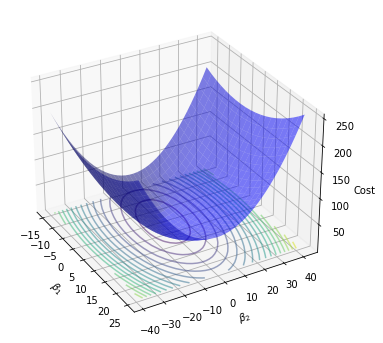

In [154]:
ms = np.linspace(beta[0] - 20 , beta[0] + 20, 20)
bs = np.linspace(beta[1] - 40 , beta[1] + 40, 40)
M, B = np.meshgrid(ms, bs)
zs = np.array([objective_log_loss_l2(b, X_train[:,[0, 1]], y_train, L, 0.1, 0.1) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel=r'$\beta_{1}$',
                     ylabel=r'$\beta_{2}$', zlabel='Cost')

# plot mse loss hypersurface and contours
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
ax.view_init(elev=30, azim=-30)
# plot start and end points
ax.plot([betas_l1_1[0][0]], [betas_l1_1[0][1]], [losses_l1_1[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([betas_l1_1[-1][0]], [betas_l1_1[-1][1]], [losses_l1_1[-1]] , markerfacecolor='b', marker='o', markersize=7)
#
# # plot gradient descent curves
ax.plot(betas_l1_1[:, 0], betas_l1_1[:, 1], losses_l1_1, markeredgecolor='r', marker='.', markersize=2)
ax.plot(betas_l1_1[:, 0], betas_l1_1[:, 1], 0, markeredgecolor='r', marker='.', markersize=2)

# set viewpoint

plt.show()


In [158]:
log_loss_cp(X_train, y_train, betas_l1_1[-1])

0.5638304856916093